In [14]:
library(ggplot2)
data = read.csv("Lab5.csv")
data

size,naive,better,blas
100,0.000960,0.000473,0.000244
200,0.008148,0.003976,0.000730
300,0.029296,0.011924,0.001720
400,0.140343,0.029789,0.009417
500,0.722235,0.077880,0.043593
600,1.524316,0.135463,0.047814
700,2.770664,0.229712,0.077259
800,4.756296,0.345429,0.126475
900,7.012149,0.531033,0.216004
1000,9.865802,0.678298,0.293843


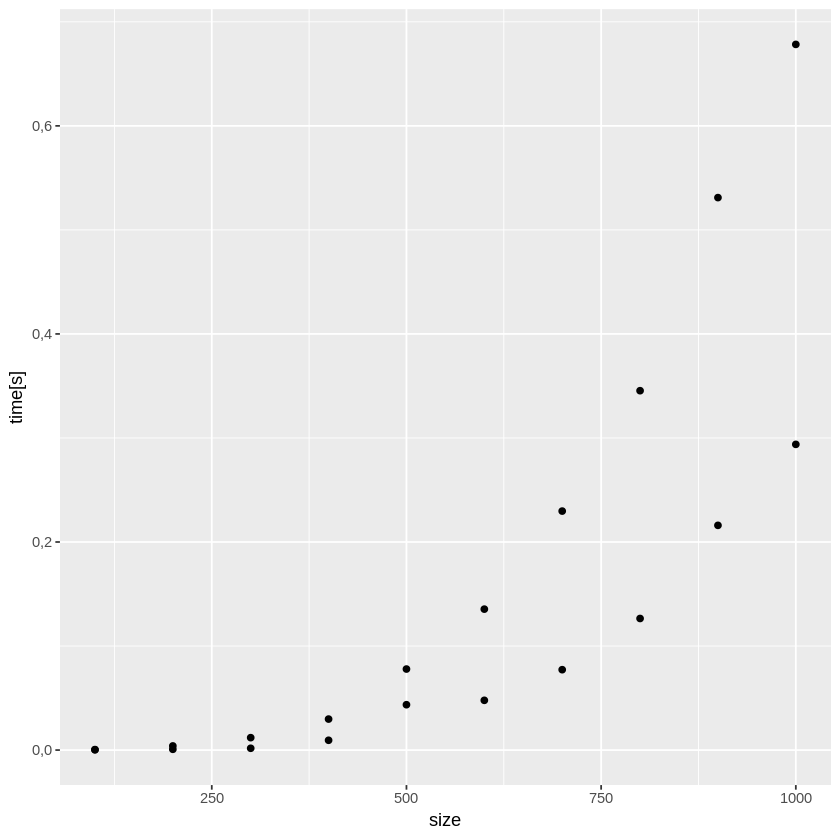

In [30]:
better_plot <- ggplot(data, aes(size, better)) + geom_point(data=data, aes(size, better)) + labs(x="size", y="time[s]")
naive_plot <- geom_point(data=data, aes(size, naive))
blas_plot <- geom_point(data=data, aes(size, blas))
better_plot + naive_plot + blas_plot

In [28]:
x = data[["size"]]
y_naive = data[["naive"]]
y_better = data[["better"]]
y_blas = data[["blas"]]

naive_data = data.frame(x, y_naive)
better_data = data.frame(x, y_better)
blas_data = data.frame(x, y_blas)

fit_naive = lm(y_naive ~ poly(x, 3, raw = TRUE), data = data)
fit_better = lm(y_better ~ poly(x, 3, raw = TRUE), data = data)
fit_blas = lm(y_blas ~ poly(x, 2, raw = TRUE), data = data)

new_naive_data = data.frame(x=seq(30, 1000, length.out=2500))
new_naive_data$y_naive = predict(fit_naive, new_naive_data)
new_better_data = data.frame(x=seq(30, 1000, length.out=2500))
new_better_data$y_better = predict(fit_better, new_better_data)
new_blas_data = data.frame(x=seq(30, 1000, length.out=2500))
new_blas_data$y_blas = predict(fit_blas, new_blas_data)

### Wykres wszystkie 3 sposoby na raz (naive, better, blas)

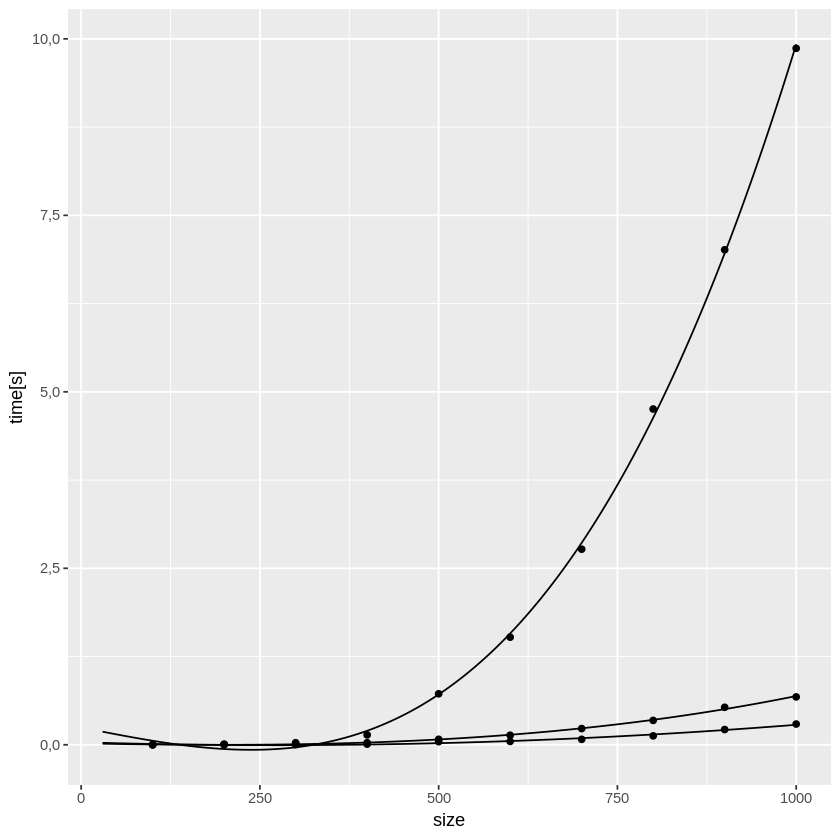

In [32]:
better_plot + naive_plot + blas_plot + geom_line(data=new_naive_data, aes(x, y_naive)) + geom_line(data=new_better_data, aes(x, y_better)) + geom_line(data=new_blas_data, aes(x, y_blas))

### Wykres zawierający tylko better i blas

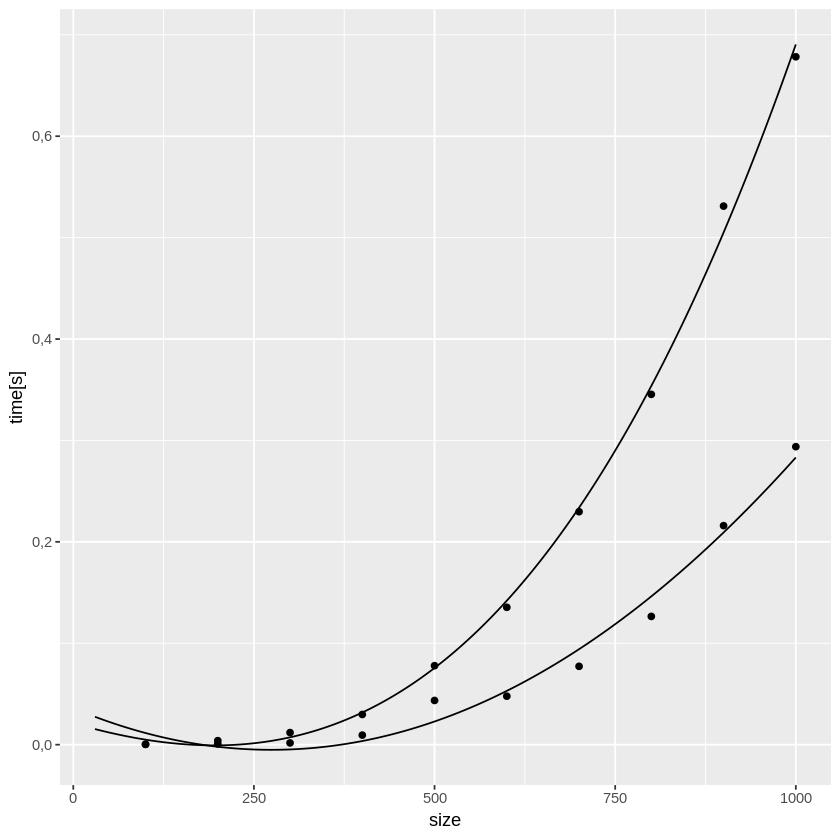

In [33]:
better_plot + blas_plot + geom_line(data=new_better_data, aes(x, y_better)) + geom_line(data=new_blas_data, aes(x, y_blas))